## Demo for learning single channel PSF from SMLM data

##### Setup environment

In [1]:
import sys
sys.path.append("..")
from psflearning.psflearninglib import psflearninglib
from psflearning import io
from psflearning.makeplots import *
import tensorflow as tf
#main_data_dir = io.param.load('datapath.yaml').main_data_dir
try:
    gpus = tf.config.list_physical_devices('GPU')
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
    print('Running on GPU')
except:
    print('Running on CPU')

Running on GPU


##### Create psflearning object and load the config file
$\small\color{skyblue}{\mathrm{basefile}}$: config file with all parameters  
$\small\color{skyblue}{\mathrm{sysfile}}$: config file with microscope specific parameters  
For advanced user, pass in base file only as below to interact with all parameters:   
```python
    L.param = io.param.combine('config_base')
```

In [2]:
L = psflearninglib()
L.param = io.param.combine(basefile='config_base',psftype='insitu',channeltype='1ch',sysfile='TIRF')

##### Edit user defined parameters

In [3]:

L.param.datapath = r'Y:\Projects\Super Critical Angle Localization Microscopy\Data\10-06-2023\Data4/'
L.param.filelist = [r'Y:\Projects\Super Critical Angle Localization Microscopy\Data\10-06-2023\Data4\Data4-2023-10-7-17-36-53.h5']
L.param.gain = 0.44
L.param.ccd_offset = 100
L.param.option.insitu.stage_pos = 0.6 # micron, stage position relative to infocus at the coverslip
L.param.option.model.symmetric_mag = True
L.param.option.model.const_pupilmag = True
L.param.option.insitu.repeat = 3
L.param.roi.peak_height = 0.4
L.param.option.model.bin=1
L.param.option.model.n_max = 6

**Step 1**: use the following settings to estimate the PSF model without index mismatch, Then use the output .h5 in SMAP for localization. 
- Set `L.param.savename = L.param.datapath + 'psf_kimm'` 

In [6]:
L.param.savename = L.param.datapath+'psf_kimm'
L.param.loss_weight.Inorm = 0.0 # weight for the minimizing the stage position
L.param.option.insitu.stage_tilt = [0,0] # tilt in [y,x], unit: nm/pixel [0.3434551, 0.9670874]
L.param.option.imaging.RI.med = 1.516
L.param.option.insitu.var_stagepos = False

**Step 2**: use the Matlab script `stage_tilt.m` to estimate the stage tilt. 
- Copy the estimated stage tilt to `L.param.option.insitu.stage_tilt` below. 
- Set `L.param.savename = L.param.datapath + 'psf_kmed_tilt'`.   

**Step 3**. use the following settings to relearn the PSF model with index mismatch. 

*Note:* when relearn the PSF model, run the notebook from the beginning, or click `Restart` and run from the beginning.

In [4]:
L.param.savename = L.param.datapath+'psf_kmed_tilt'
L.param.loss_weight.Inorm = 0.01 # weight for the minimizing the stage position
L.param.option.insitu.stage_tilt = [1.07959093, -0.83596484] # tilt in [y,x], unit: nm/pixel [0.3434551, 0.9670874], [1.1165019,-0.8734602]
L.param.option.imaging.RI.med = 1.335
L.param.option.insitu.var_stagepos = True

##### Start learning

In [5]:
images = L.load_data()
L.getpsfclass()
dataobj = L.prep_data(images)
resfile = L.iterlearn_psf(dataobj,time=0)

(1900, 256, 256)
rois shape channel : (9125, 21, 21)


4/6: calculating spline coefficients: 1/1 [00:01s]  1.03s/it total time: 1.01s
5/6: localization: 2/2 [00:00s] 12.44it/s total time: 1.17s
c:\ProgramData\Anaconda3\envs\psfinv\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\ProgramData\Anaconda3\envs\psfinv\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
3/6: learning: 348/? [00:46s]  7.41it/s, current loss: 0.57269, total time: 46.98s  


outlier percentage: 0.22921615201900236
rois shape channel : (649, 21, 21)


3/6: learning: 228/250 [00:27s]  8.35it/s, current loss: 0.52567, total time: 74.28s
4/6: calculating spline coefficients: 1/1 [00:01s]  1.01s/it total time: 1.00s
5/6: localization: 2/2 [00:00s] 16.02it/s total time: 1.13s
6/6: saving results: [00:02s] total time: 3.42s
4/6: calculating spline coefficients: 1/1 [00:01s]  1.06s/it total time: 1.05s
5/6: localization: 2/2 [00:00s]  4.41it/s total time: 1.50s
3/6: learning: 206/250 [00:42s]  4.85it/s, current loss: 0.52052, total time: 42.51s


outlier percentage: 0.2315989847715736
rois shape channel : (1211, 21, 21)


3/6: learning: 133/250 [00:22s]  5.81it/s, current loss: 0.50439, total time: 65.41s
4/6: calculating spline coefficients: 1/1 [00:01s]  1.02s/it total time: 1.01s
5/6: localization: 2/2 [00:00s]  7.90it/s total time: 1.26s
6/6: saving results: [00:02s] total time: 3.57s
4/6: calculating spline coefficients: 1/1 [00:01s]  1.03s/it total time: 1.01s
5/6: localization: 2/2 [00:00s]  3.94it/s total time: 1.52s
3/6: learning: 207/250 [00:36s]  5.63it/s, current loss: 0.50814, total time: 36.78s


outlier percentage: 0.23865414710485133
rois shape channel : (973, 21, 21)


3/6: learning: 122/250 [00:18s]  6.71it/s, current loss: 0.49317, total time: 54.97s
4/6: calculating spline coefficients: 1/1 [00:01s]  1.01s/it total time: 1.00s
5/6: localization: 2/2 [00:00s]  7.79it/s total time: 1.26s
6/6: saving results: [00:02s] total time: 3.41s


##### Show results

In [27]:
resfile = r'Y:\Projects\Super Critical Angle Localization Microscopy\Data\10-06-2023\Data4\psf_kmed_tilt2_insitu_zernike_single.h5'

In [28]:
f,p = io.h5.load(resfile) # load result file

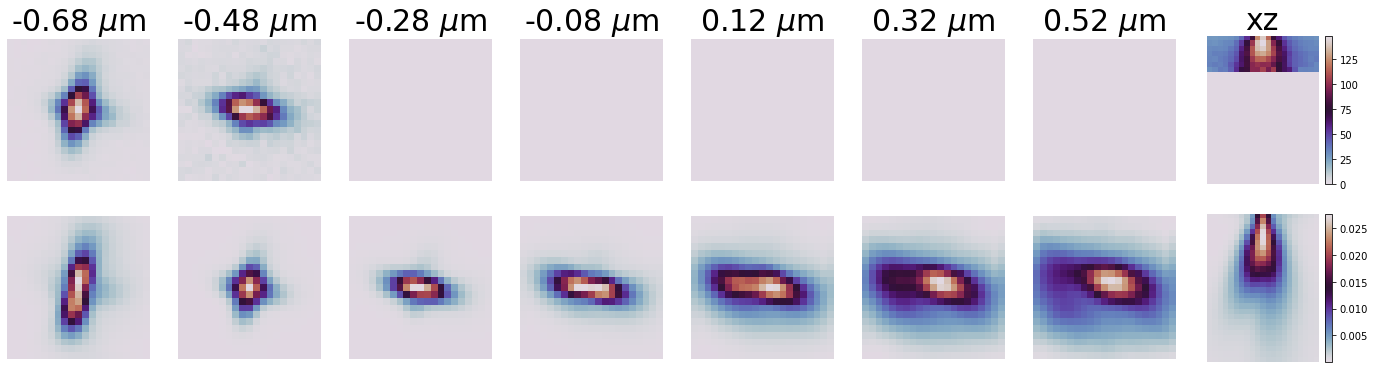

In [29]:
showpsfvsdata_insitu(f,p)

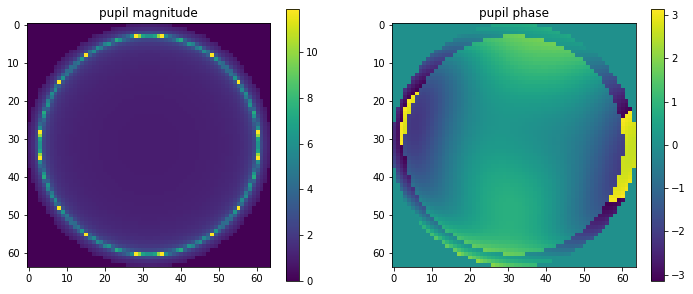

In [21]:
showpupil(f,p)

##### Optional plots

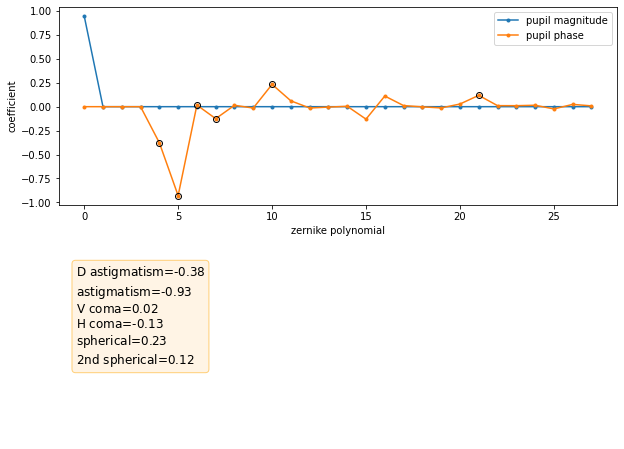

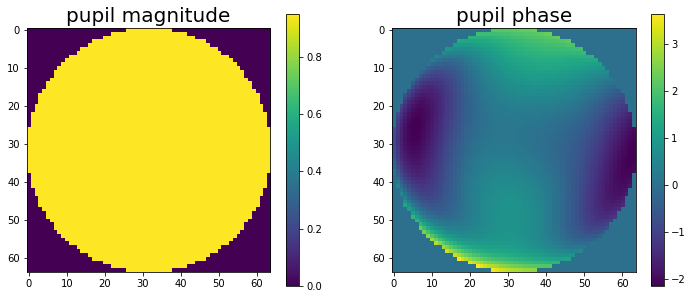

In [22]:
try:
    showzernike(f,p)
except:
    print('no Zernike coefficients')

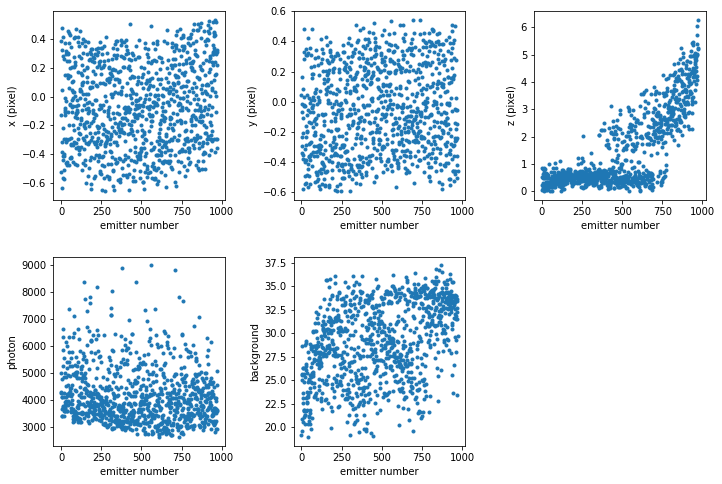

In [30]:
showlearnedparam_insitu(f,p)

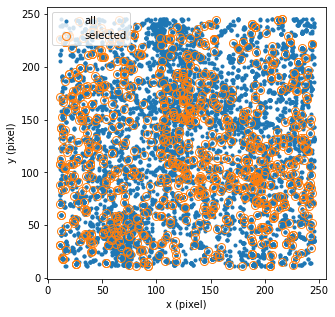

In [9]:
showcoord(f,p)

**Step 4:** check residue stage tilt

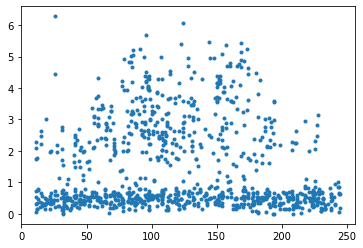

In [31]:
plt.plot(f.res.cor[:,-2],f.res.pos[:,0],'.')

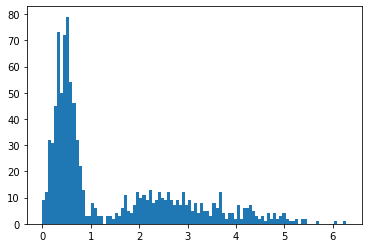

In [32]:

plt.hist(f.res.pos[:,0],bins=100)
plt.show()

adjust lower and upper limit in `mask` to select emitters at the coverslip

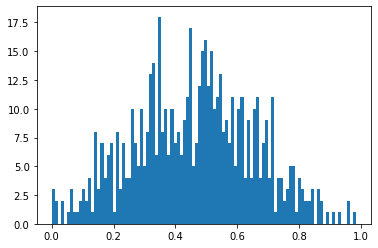

In [33]:
mask = (f.res.pos[:,0]<1) & (f.res.pos[:,0]>0)
plt.hist(f.res.pos[mask,0],bins=100)
plt.show()

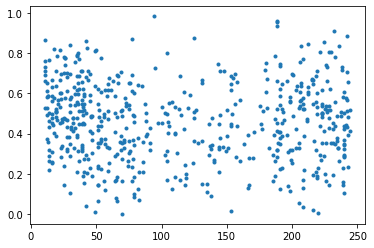

In [34]:
plt.plot(f.res.cor[mask,-1],f.res.pos[mask,0],'.')

estimate residue stage tilt from the selected emitters

In [35]:
X = np.vstack([f.res.cor[mask,-2],f.res.cor[mask,-1],np.ones(np.sum(mask))])
Y = f.res.pos[mask,0]*p.pixel_size.z*1e3
beta=np.matmul(np.matmul(np.linalg.inv(np.matmul(X,X.transpose())),X),Y.transpose())

In [36]:
beta[0:2]*f.rois.image_size[-1] # residual stage tilt across FOV, unit: nm

array([ 1.33378968, -1.33692686])

**Step 5:** if residue stage tilt is greater than 10 nm, copy the output to `L.param.option.insitu.stage_tilt` at *Step 2*, and repeat *Steps 3-4*.

In [33]:
p.option.insitu.stage_tilt-beta[0:2] # corrected stage tilt, unit: nm/pixel

array([ 1.07959093, -0.83596484])

**Step 6:** Generate FD psf model for deepfit training

In [21]:
f.res.stagetilt*f.rois.image_size[-1] #total stage tilt across the FOV, unit: um

array([[[ 0.27637526]],

       [[-0.214007  ]]], dtype=float32)

In [37]:
Ndiv = 10 # number of divisions in x and y dimensions across the FOV
xrange = np.linspace(0,f.rois.image_size[-1],Ndiv+1,dtype=np.float32)
yrange = np.linspace(0,f.rois.image_size[-2],Ndiv+1,dtype=np.float32)
[xx,yy] = np.meshgrid(xrange,yrange)
cor = np.vstack((yy.flatten(),xx.flatten())).transpose()
Nz = f.res.I_model.shape[0]
xsz = f.res.I_model.shape[-1]
I_model = []
for i,cori in enumerate(cor):
    stpos = f.res.stagepos + cori[-1]*f.res.stagetilt[-1] + cori[-2]*f.res.stagetilt[-2]
    f,psfobj = L.genpsf(f,Nz=Nz,xsz=xsz,stagepos=stpos)
    I_model.append(f.res.I_model)

I_model = np.stack(I_model)
I_model = np.reshape(I_model,(Ndiv+1,Ndiv+1,Nz,xsz,xsz))

display the FD psf model

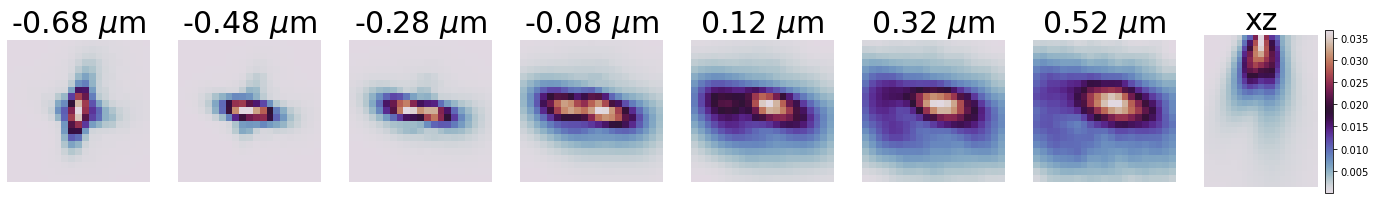

In [38]:
f.res.I_model = I_model[0,0] # first two indices are the global locations of the PSF, unit: division index
showpsf(f,p)

In [39]:
f.res.stagepos

array([0.15995756], dtype=float32)

save the FD psf model

In [40]:
f.res.I_model = I_model
filename = resfile[:-3]+'_5D_tilt.h5'
L.writeh5file(filename,f.res,f.locres,f.rois)

**Step 7:** Open `load.jl` in `MicroscopePSF` package (branch: test_IMMpsf), use lines 49-54 to convert above .h5 to .jld2 file.     
**Step 8:** Open `test_train.jl` in `SMLMDeepFit.jl`, use the above generated .jld2 file to for training.   
- set `minz` and `maxz` based on the z range in the spline PSF model.
- set `bgmaxz` equal to `abs(minz)`.
- set `photons` and `minphotons` based on the SMAP localization results.
- set `bg` to be around 1.4 times the median background in the SMAP localization results.   

**Step 9:** Open `inference_visualize_celldata_SEQ_FD.ipynb` in `SMLMDeepFit.jl`, use the trained model for localizations.   
**Step 10:** Use Matlab script `smld2smap.m` to convert .h5 from deepfit to .mat file for visualization in SMAP. 
